In [2]:
from torchvision import transforms,datasets
from torch.utils.data.dataset import Dataset
import torch

import PIL
import numpy as np
import h5py

import subprocess

In [3]:
class SFBD(Dataset):
    
    """
        A custom dataloader for Stanford Background Dataset.
        http://dags.stanford.edu/projects/scenedataset.html
        
        It works after some preprocessing of converting the regions map into one hot encoding\
        form in .h5py format
        
        Authors:
            Dibya Prakash Das
            Sangeet Kumar Mishra
            
    """
    
    def __init__(self,image_path,region_path,transform=None):
        
        """
            image_path : The location of the SBD's images
            region_path : The location of the individual one_hot_encodified ".h5" files
            transform : yet to be implemented
        """
        
        self.image_path = image_path
        self.region_path = region_path
        self.file_list =  subprocess.getoutput("ls "+image_path).split("\n")
        self.len_files = len(self.file_list)
        self.regions = subprocess.getoutput("ls "+region_path).split('\n')
        
    def load_h5py(self,file):
        
        """
            loads a '.h5' file of shape  into a numpy array and returns it. 
        """
        
        with h5py.File("{}{}".format(self.region_path,file),"r") as hf:
            loaded = hf["OHE"][:]
        return loaded
        

    
    def __len__(self):
        
        """
            returns the number of files
        """
        return self.len_files        
    
    def __getitem__(self,index):
        
        """
            gives an image and its all classes in one hot encoding form
        """
        
        region = SFBD.load_h5py(self,self.regions[index])
        image = PIL.Image.open(self.image_path + self.file_list[index])
        resized_image = np.array(image.resize((500,500),PIL.Image.NEAREST)).T
        image_tensor = torch.from_numpy(resized_image)
        region_tensor = torch.from_numpy(region)
        return {'image':image_tensor,'region':region_tensor}

In [20]:
#instatiate
sf = SFBD(image_path="./iccv09Data/images/",region_path="./h5py/")
print(len(sf[0]))

2


In [5]:
# access an element by idex
sf[57]['image'].byte().numpy().shape

(3, 500, 500)

In [6]:
np.array(sf[56]['region'][0],dtype='uint8')*100

array([[100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

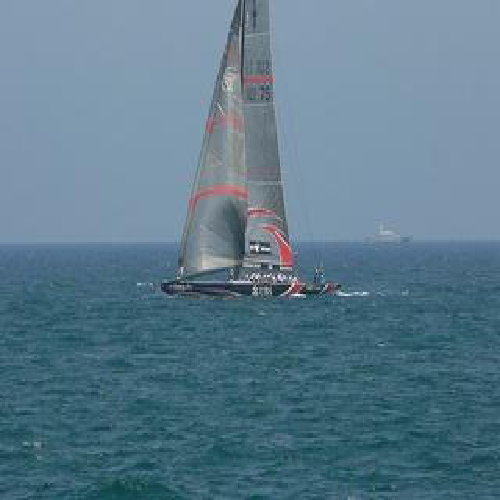

In [24]:
PIL.Image.fromarray(sf[45]['image'].numpy().T)  ### very very important feature

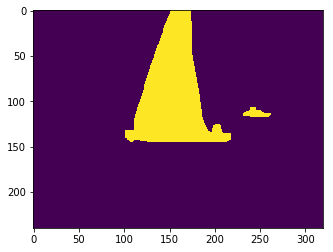

In [30]:
import matplotlib.pyplot as plt
for i in range(8):
    plt.imshow(np.array(sf[45]['region'].numpy()[i]))

In [9]:
len(sf)

560

In [10]:
sf.regions[0]

'h5py_0000047.regions.txt'

In [11]:
len(sf.regions)

560

In [12]:
sf[56]['region'][3]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], dtype=torch.float64)

In [18]:
dataset_loader = torch.utils.data.DataLoader(sf,
                                             batch_size=8, shuffle=False,
                                             num_workers=1)

In [19]:
a=sf[4]

In [20]:
a

{'image': tensor([[[237, 237, 241,  ...,  73,  69,  69],
          [237, 237, 241,  ...,  73,  69,  69],
          [238, 238, 242,  ...,  74,  69,  69],
          ...,
          [252, 252, 252,  ...,  84,  83,  83],
          [252, 252, 252,  ...,  83,  83,  83],
          [252, 252, 252,  ...,  83,  83,  83]],
 
         [[241, 241, 245,  ...,  90,  86,  86],
          [241, 241, 245,  ...,  90,  86,  86],
          [242, 242, 246,  ...,  91,  86,  86],
          ...,
          [252, 252, 252,  ..., 106, 105, 105],
          [252, 252, 252,  ..., 105, 105, 105],
          [252, 252, 252,  ..., 105, 105, 105]],
 
         [[240, 240, 244,  ..., 106, 102, 102],
          [240, 240, 244,  ..., 106, 102, 102],
          [241, 241, 245,  ..., 107, 102, 102],
          ...,
          [252, 252, 252,  ..., 129, 128, 128],
          [252, 252, 252,  ..., 128, 128, 128],
          [252, 252, 252,  ..., 128, 128, 128]]], dtype=torch.uint8),
 'region': tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
  

In [21]:
type(a)

dict

In [22]:
a.keys()

dict_keys(['image', 'region'])

In [23]:
import pickle as pk

In [24]:
with open("a.d","wb") as f:
    pk.dump(a,f)